In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Downloads/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


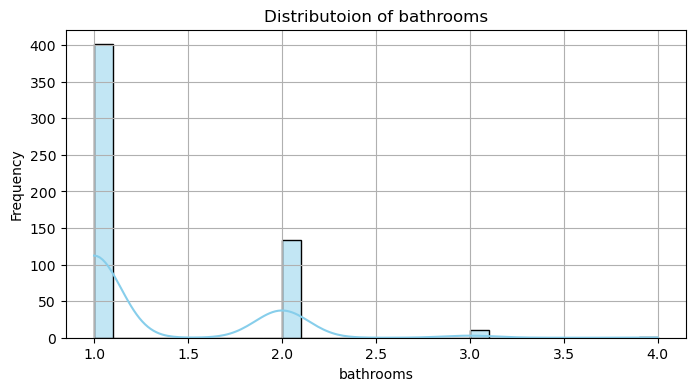

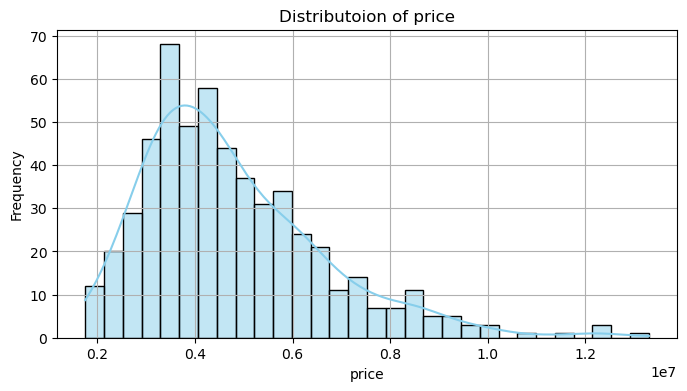

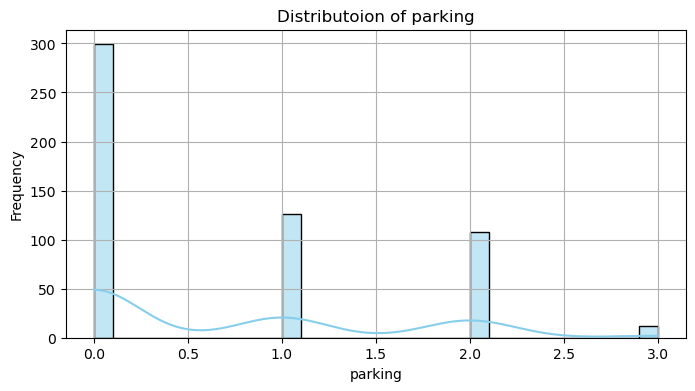

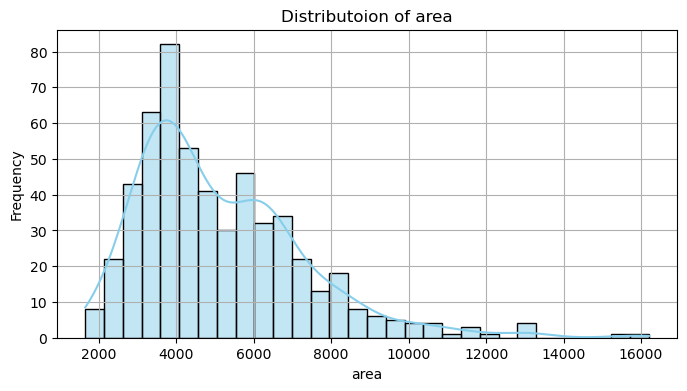

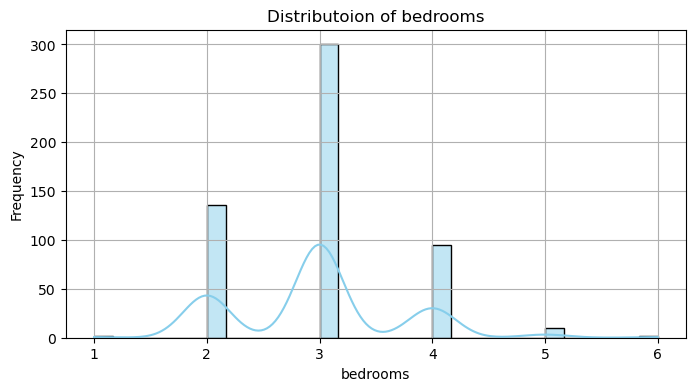

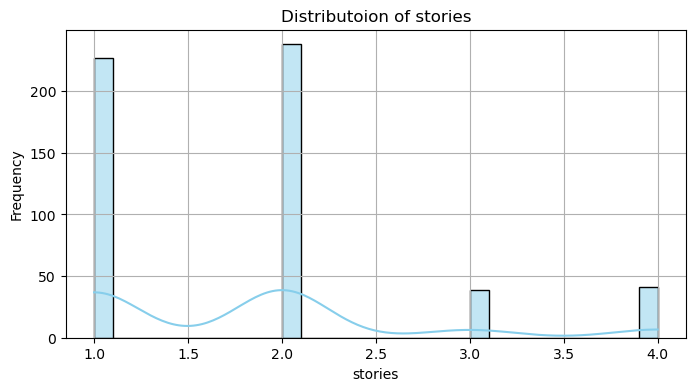

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = {'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'}

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distributoion of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

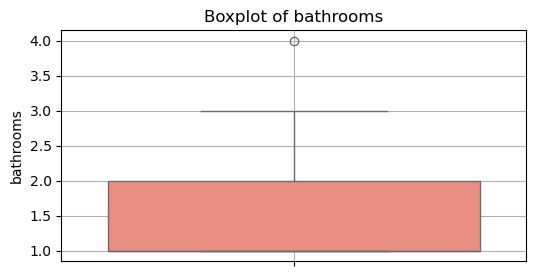

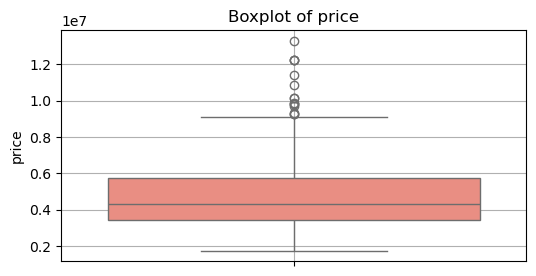

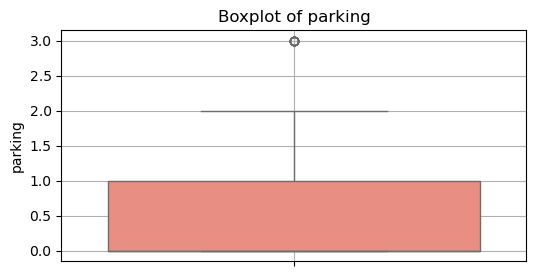

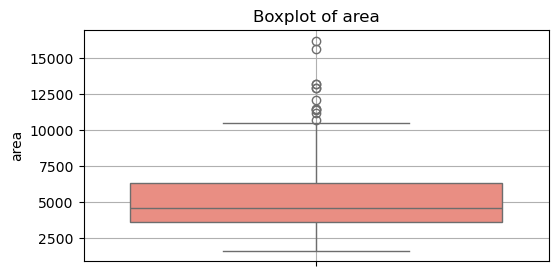

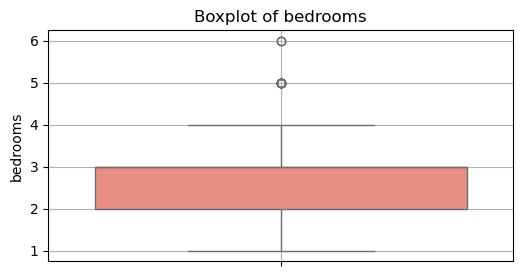

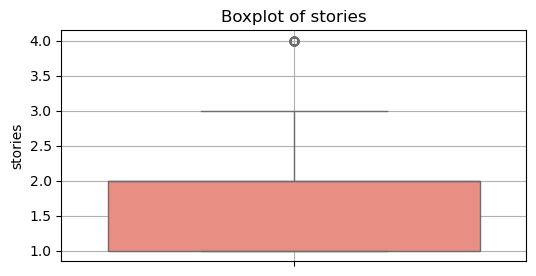

In [3]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

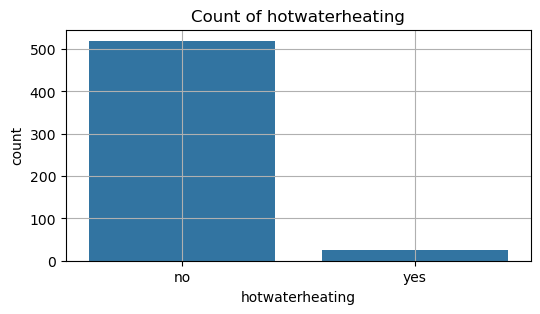

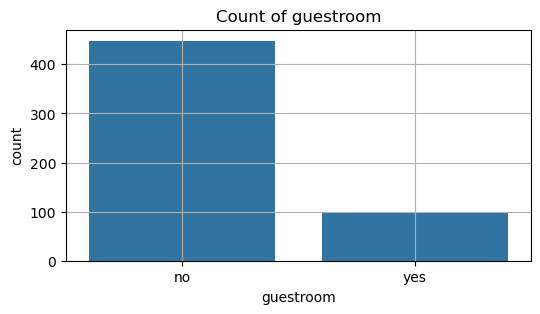

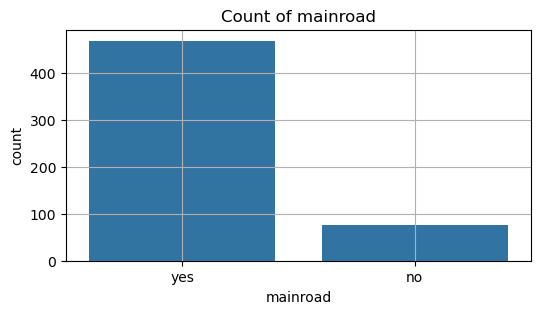

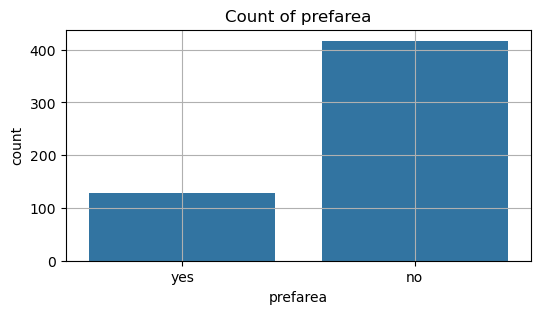

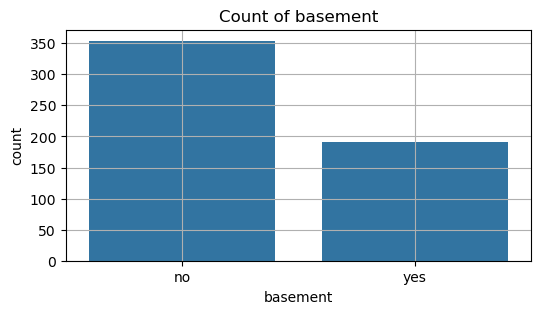

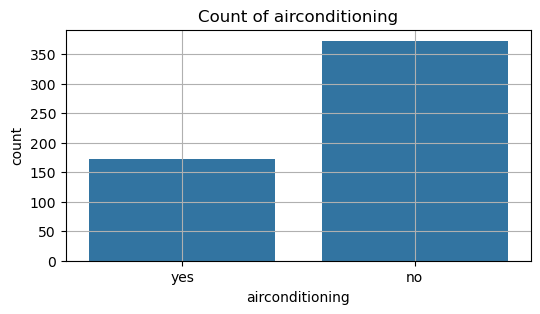

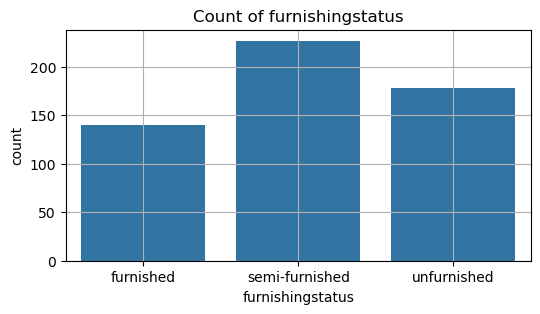

In [4]:
cat_cols = {'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'}
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.grid(True)
    plt.show()

 Numerical Feature vs. Target (price)

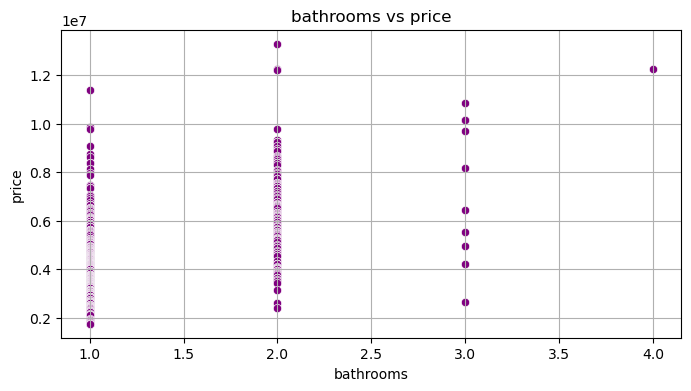

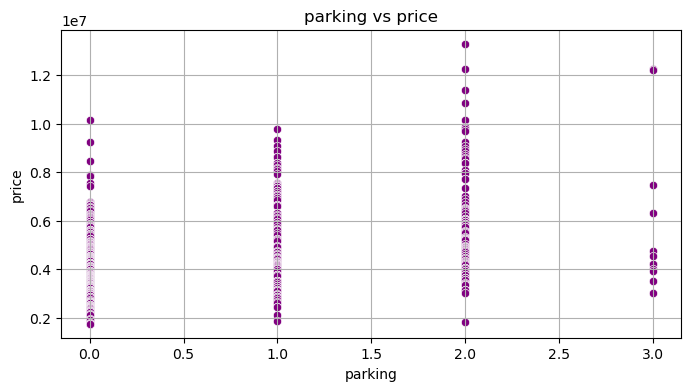

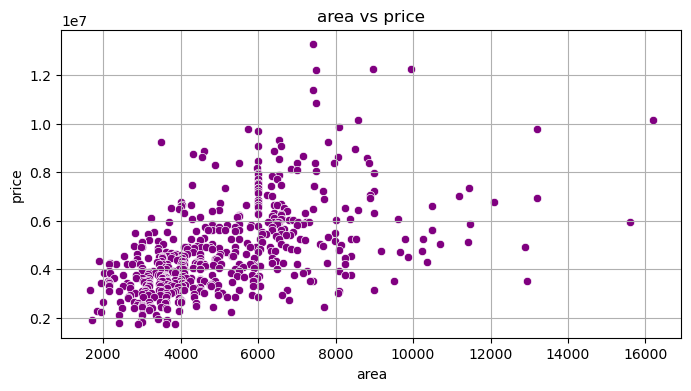

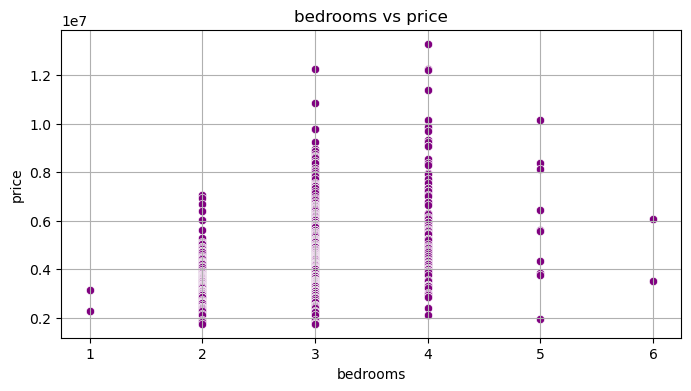

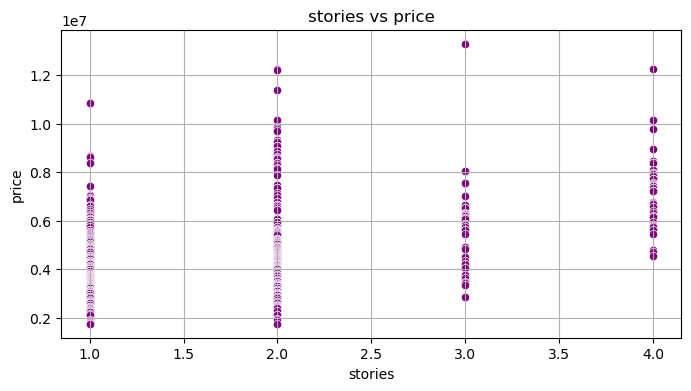

In [5]:
num_cols = {'area', 'bedrooms', 'bathrooms', 'stories', 'parking'}

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df['price'], color='purple')
    plt.title(f'{col} vs price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.grid(True)
    plt.show()

Categorical Feature vs. Target (price)

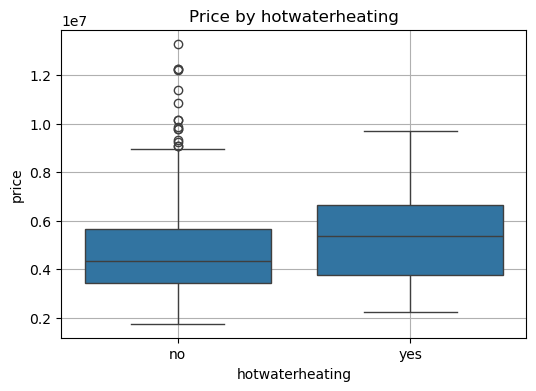

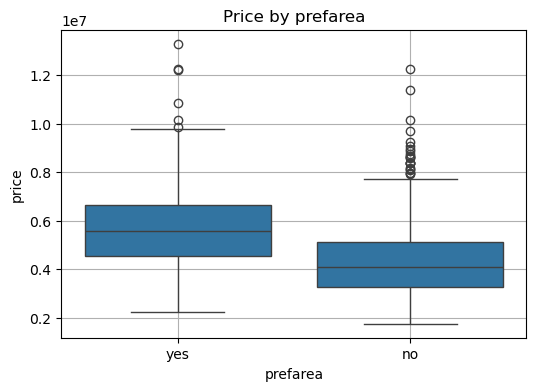

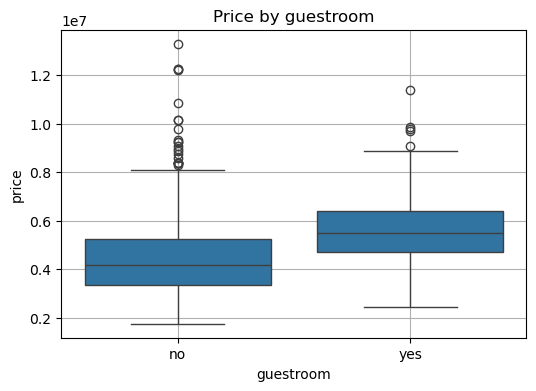

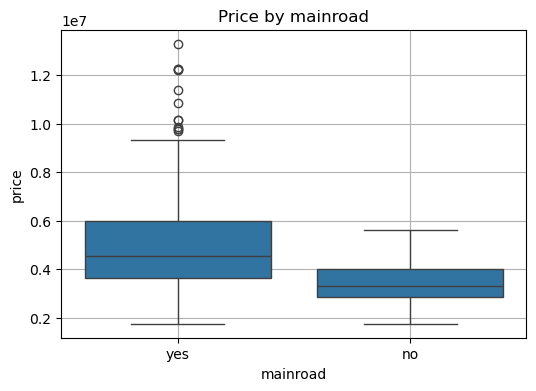

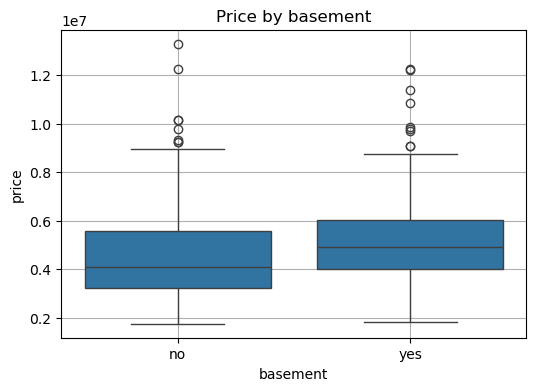

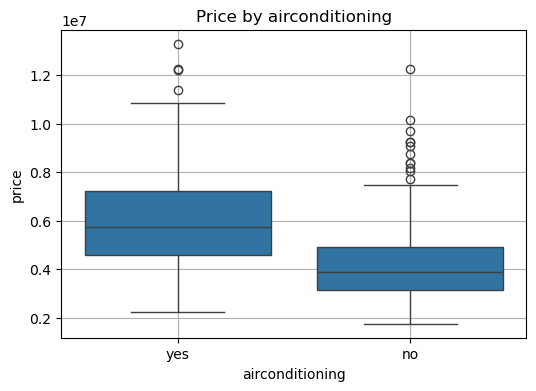

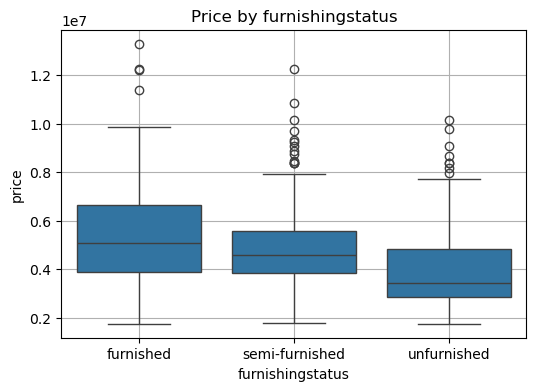

In [6]:
cat_cols = {'mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus'}

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price by {col}')
    plt.grid(True)
    plt.show()

Let's see Grouped Mean Prices

In [7]:
for col in cat_cols:
    print(f'\nAverage price by {col}')
    print(df.groupby(col)['price'].mean())


Average price by hotwaterheating
hotwaterheating
no     4.728593e+06
yes    5.559960e+06
Name: price, dtype: float64

Average price by prefarea
prefarea
no     4.425299e+06
yes    5.879046e+06
Name: price, dtype: float64

Average price by guestroom
guestroom
no     4.544546e+06
yes    5.792897e+06
Name: price, dtype: float64

Average price by mainroad
mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

Average price by basement
basement
no     4.509966e+06
yes    5.242615e+06
Name: price, dtype: float64

Average price by airconditioning
airconditioning
no     4.191940e+06
yes    6.013221e+06
Name: price, dtype: float64

Average price by furnishingstatus
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


Pairplot

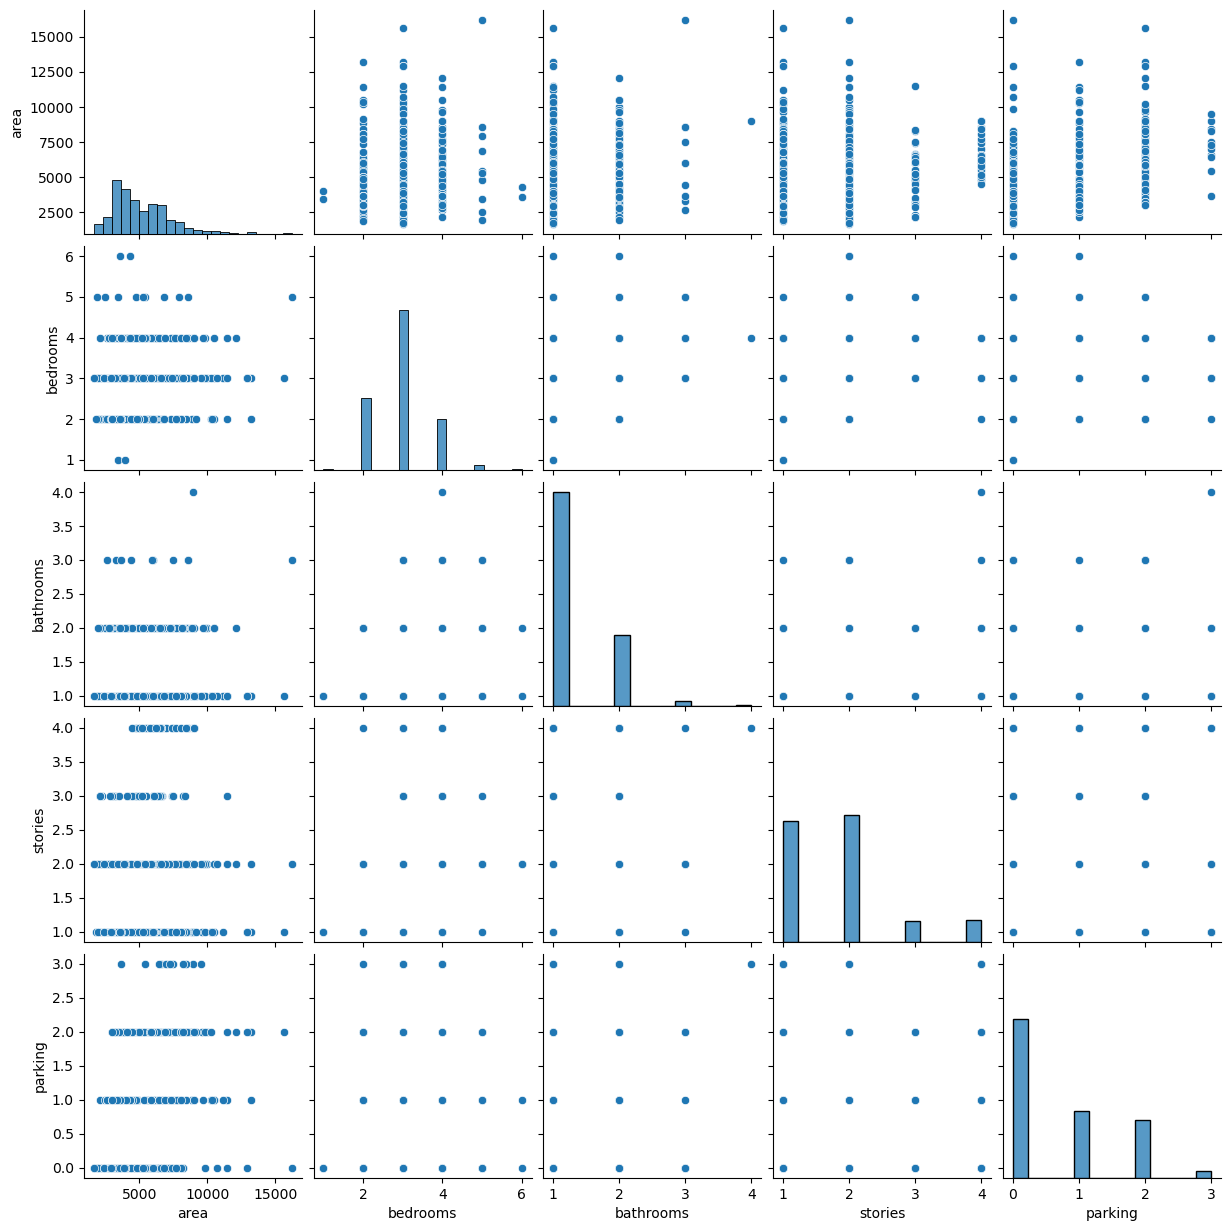

In [8]:
sns.pairplot(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

In [9]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


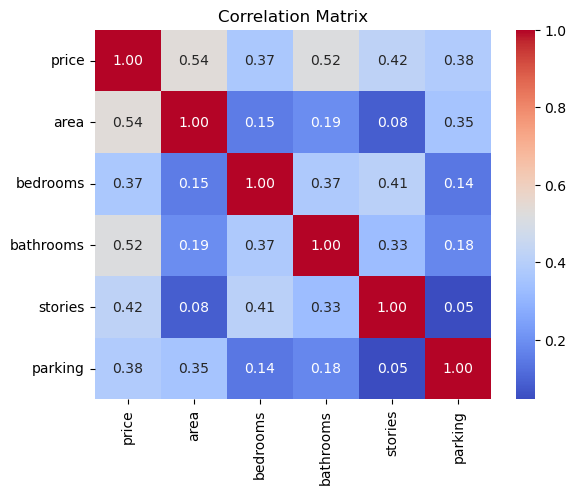

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

As we can see, the area, bathrooms, and stories are the top numerical predictors of price.